# Handling API Data


In this lesson you will learn how to get API data from public APIs that DONT need an API key.



- What Is Fetch?
- What Is Response?
- How To Use Response
- Using Simple User Input

#### Throught this lesson the code below will be referred to as a simple example to work with
https://api.dictionaryapi.dev/api/v2/entries/en/INSERT_WORD_HERE

In [ ]:
%%html

<html>
<body>
<input type="text" id="search" placeholder="Search for a word">
<button onclick="FetchData()">Search</button><br>
<div id="result"></div>

    <script>
        async function  FetchData() {
             document.getElementById("result").innerHTML = "";
            try {
                 const word = document.getElementById("search").value.toLowerCase();
                if (!word) {
                    alert("Please enter a word to search.");
                    return;
                }

                if (word.includes(" ")) {
                    document.getElementById("result").innerHTML = "<p>Please enter a single word without spaces.</p>";
                    return;
                }

                const response = await fetch(`https://api.dictionaryapi.dev/api/v2/entries/en/${word}`);

                if (response.status === 404) {
                    document.getElementById("result").innerHTML = "<p>Word not found.</p>";
                    throw new Error("word not found");
                    return;
                }

                if (response.status === 429) {
                    document.getElementById("result").innerHTML = "<p>Too many requests. Please try again later.</p>";
                    throw new Error("Too many requests. Please try again later.");
                    return;
                }

                if (response.status === 500) {
                    document.getElementById("result").innerHTML = "<p>Server error. Please try again later.</p>";
                    throw new Error("Server error. Please try again later.");
                    return;
                }

                    if (!response.ok) {
                    console.log(response)
                    throw new Error("Network response was not ok");
                }


                const data = await response.json();
                const meaning = data[0].meanings[0];

                const input = document.getElementById("search");
                const resultDiv = document.getElementById("result");

                console.log(data)
                console.log("Definition:", meaning.definitions[0].definition);

                resultDiv.innerHTML = `
                    <h2>Word: ${data[0].word}</h2>
                    <p><strong>Definition:</strong> ${meaning.definitions[0].definition}</p>
                    <p><strong>Part of Speech:</strong> ${meaning.partOfSpeech}</p>
                `;
            }
            catch (error) {
                console.error("Fetch error:", error);
            }
        }
    </script>
</body>
</html>

# What Is **Fetch**?

Fetch is a function that is used to **get information** across the web using **HTTPS** requests. By default Fetch is set to **"GET"**. Using fetch we can **collect data** from public (or private) APIs allowing us to expand our tools/code with servers either public or your very own private api

See the functions below

- GET – to get data
- POST – to create data
- PUT – to replace/update data
- PATCH – to partially update data
- DELETE – to delete data


In [24]:
%%html
<html>
    <!-- Creates The Output Area -->
    <div id="demo1Result"></div>

<script>
    // Calls The Function
FetchDef();

async function FetchDef() {
    // will fetch the word "code" for simplicity
    try{
    const response = await fetch("https://api.dictionaryapi.dev/api/v2/entries/en/code");

    // Checks if the fetch was successful
    if (!response.ok) {
        throw new Error("Network response was not ok");
    } 
    // Grabes The JSON data from the response
    const data = await response.json();
    console.log(data);
    // Puts data into the html

    document.getElementById("demo1Result").innerHTML =
     `<h3>The word is: ${data[0].word} </h3><br>
   <p><strong> Definition: </strong> ${data[0].meanings[0].definitions[0].definition} </p>`
}
    catch (error) {
        console.error("Fetch error:", error);
        document.getElementById("demo1Result").innerHTML = "<p>Error fetching data. Please try again later.</p>";
    }
}
</script>
</html>

## Breakdown

First we create an **async** function and use **try and catch** to safley call out API

In the code above we are finding the definition of the word "Code" as the url is ending with /code 
URL: "https://api.dictionaryapi.dev/api/v2/entries/en/code"

using the Fetch function we are able to fetch the data from the API




###### **NOTE not all APIs are the same read API documentation before calling th api**<br> This is the case for this API not every API you see <br> example: an api might not use /INSERT_WORD at the end of the URL



In [23]:
%%js
// This code snippet is a simple example of how to fetch data from an API
// await does not work in this context
const Response = await fetch('https://api.dictionaryapi.dev/api/v2/entries/en/hello')

<IPython.core.display.Javascript object>

When we call the Fetch function the API will do some stuff on its end then it will send over data from their server to our fetch function.<br>

This is were we use response to store the data given to us from the API

Then we check to see if the request went through to the server using the "ok" data provided with the response from the API

In [ ]:
    if (!response.ok) {
        throw new Error("Network response was not ok");
    } 

And finally we get the JSON data from out response and update the text inside the div to show the Word, <br> and the first word definition provided in **data.meanings**

In [ ]:
    const data = await response.json();
    console.log(data);

    document.getElementById("").innerHTML =
     `<h3>The word is: ${data[0].word} </h3><br>
   <p><strong> Definition: </strong> ${data[0].meanings[0].definitions[0].definition} </p>`

# What Is Response?

Response is how we store the data given to us from the server and if our request was processed or failed<br>

When we send a response the data given back will store 2 important values for errors. These values are "Ok" and "Status"<br>

These will let us know if our reqest went through

### Status Code Ranges

-100–199 — Informational
The request was received processing continues.

-200–299 — Success
The request was successful.

-300–399 — Redirection
Further action is needed (e.g. redirected to a new URL).

-400–499 — Client Error
There was an issue with the request.

-500–599 — Server Error
The server failed to fulfill a valid request.


**The important ones to look out here are the 200s 400s and 500s**



Some Ways you can cause an error in your code is if the URL is incorrect such as the main domain or the extention you are changing such as the word


In [ ]:
%%js
responseDemo()

async function responseDemo() {
try {
    const Response = await fetch('https://api.dictionaryapi.dev/api/v2/entries/en/hello')

    if (!Response.ok) {
        throw new Error("Network response was not ok");
    }
}
catch (error) {
    console.error("There was a problem with the fetch operation:", error);
}
}


<IPython.core.display.Javascript object>

### **Example of a response output**

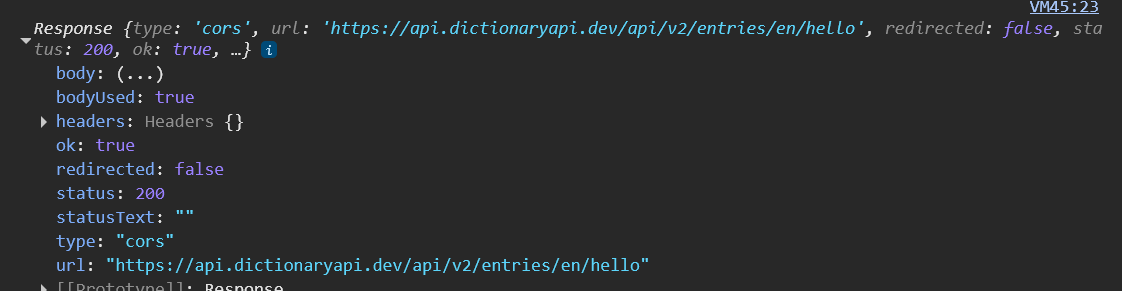

## **How To Use Response**

Response is used in many different ways depending on what data is being given



| Method       | Returns           | Use case                      |
|--------------|-------------------|------------------------------|
| json()       | Promise of JSON   | API responses with JSON data  |
| text()       | Promise of text   | Plain text or HTML pages      |
| blob()       | Promise of Blob   | Images, files, binary data    |
| arrayBuffer()| Promise of buffer | Raw binary data manipulation  |
| formData()   | Promise of FormData | HTML form submissions       |

<small> **This lesson focuses on json** </small>

For this lesson we will just use the json format of the data recived from the response

In [ ]:
%%js

dataDemo()

async function dataDemo() {
    // Try function not used for this example
    const Response = await fetch('https://api.dictionaryapi.dev/api/v2/entries/en/hello')
    const data = await Response.json() // Convert the response to JSON format
    console.log(data)
}

<IPython.core.display.Javascript object>

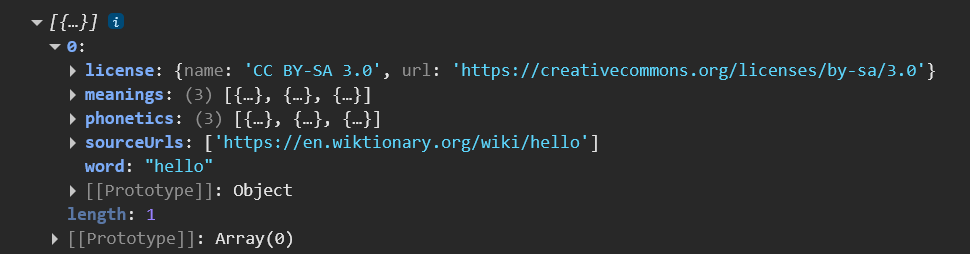

<small> example of json data </small>

With this json data we can find all the meaining of a word, the word itself, and more information Some APIs will also include json and images. We can use this data to find the meaning of a word and show it to the user at any point needed. You can call this data by using the 'Data' variable that you create. In this example you can get the def using Data.meanings

In [ ]:
const Data = await Response.json();
const Meanings = Data[0].meanings;
// Important to use [0] as the API returns an array of objects

### **Using Simple User Input**

because this is a dictionary we want the user to be able to search up whatever they want and not one set word. We can do this by changing the **end** of the **API URL** to the word we want. <br>

**https://api.dictionaryapi.dev/api/v2/entries/en/USERS_WORD**

We can get the user input by using an HTML input text box


In [32]:
%%html

<html>
<input type="Text" id="Demo1ID" placeholder="Search for a word">
</html>


Using the ID of this text box we can find it in out js code using document.getElementById(""). With this we can see the text inside the box and when a button is pressed we can send the fetch to the API to search for the word

In [45]:
%%html

<html>
  <body>
    <input type="text" id="DemoTextID1" placeholder="Search for a word">
    <button onclick="Demo2()">Search</button><br>

    <script>
      async function Demo2() {
        const val = document.getElementById("DemoTextID1").value;
        console.log("You typed: " + val);
      }
    </script>
  </body>
</html>

With the input of the user we can now insert it into the end of the API url to find the data for the word inputed. This now allows us to take in user input and "place" it inside of the api. There are more advanced methods of sending user input instead of just the URL but this lesson is just the basics os API data,

In [ ]:
%%js
//example snippet
const word = "code"
const response = await fetch(`https://api.dictionaryapi.dev/api/v2/entries/en/${word}`);

### Hack

Use the below template and try to get a JSON output for the word "lesson" or any word of your choice


In [ ]:
%%js // indicates in jupeter notebook that this is js (make sure it says js in bottom right corner)

async function fetchWordData() {

    try {


        const data =

        console.log(data);
    }
    catch (error) {
        console.error("Error fetching data:", error);

    }
}
